In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RepeatedKFold

In [194]:
df = pd.read_csv('D:\SEM 4\Supervised Machine Learning Lab\\Concrete_Data_Yeh.csv')
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [195]:
df.shape

(1030, 9)

In [196]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [198]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

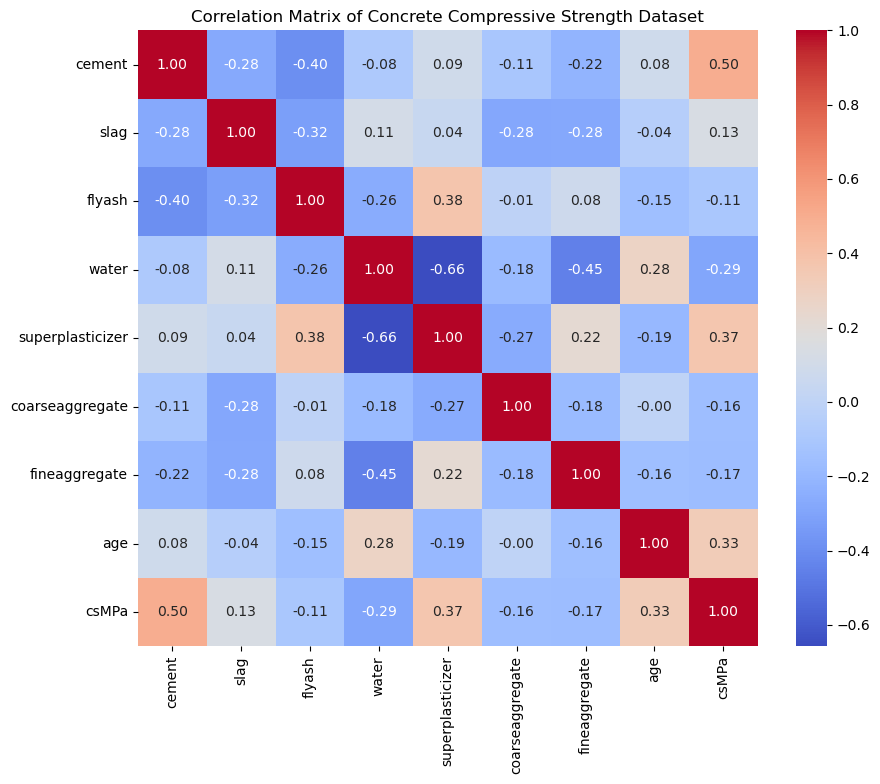

In [199]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Concrete Compressive Strength Dataset')
plt.show()

In [200]:
corr_matrix

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [201]:
X=df.drop(columns=['csMPa'])
y=df['csMPa']

In [202]:
def calc_vif(X):
    vif=pd.DataFrame()
    vif['Variance']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    
    return vif

In [203]:
calc_vif(X)

,Variance,VIF
0,cement,15.456717
1,slag,3.329127
2,flyash,4.147833
3,water,82.157569
4,superplasticizer,5.471094
5,coarseaggregate,84.955779
6,fineaggregate,72.790995
7,age,1.699459


In [204]:
X= X.drop(columns=['water', 'coarseaggregate', 'fineaggregate'])

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Multiple Linear Regression

In [206]:
lr = LinearRegression()
lr.fit(X_train,y_train)
mlr_pred=lr.predict(X_test)

In [207]:
mse_mlr = mean_squared_error(y_test, lr_pred)
rmse_mlr = np.sqrt(mse_lr)
r2_mlr = r2_score(y_test, lr_pred)

In [208]:
print("Mean Squared Error (MSE):", round(mse_lr, 2))
print("Root Mean Squared Error (RMSE):", round(rmse_lr, 2))
print("R-squared score:", round(r2_lr, 2))

Mean Squared Error (MSE): 110.26
Root Mean Squared Error (RMSE): 10.5
R-squared score: 0.57


## Polynomial Regression

In [209]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [210]:
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)

LinearRegression()

In [211]:
poly_pred = poly_regression.predict(X_test_poly)

In [212]:
mse_poly = mean_squared_error(y_test, poly_pred)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, poly_pred)

In [213]:
print("Mean Squared Error (MSE):", round(mse_poly, 2))
print("Root Mean Squared Error (RMSE):", round(rmse_poly, 2))
print("R-squared score:", round(r2_poly, 2))

Mean Squared Error (MSE): 51.61
Root Mean Squared Error (RMSE): 7.18
R-squared score: 0.8


## Lasso Regression

In [214]:
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

In [215]:
lasso_model = LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv)

In [216]:
lasso_model.fit(X_train, y_train)

C:\Users\ramit\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ramit\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45949.99237671931, tolerance: 21.106074456545215
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ramit\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ramit\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objec

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1))

In [217]:
optimal_alpha_lasso = lasso_model.alpha_
print("Optimal Alpha for Y1:", optimal_alpha_lasso)

Optimal Alpha for Y1: 0.29


In [218]:
y_pred_lasso = lasso_model.predict(X_test)

In [219]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [220]:
print("Mean Squared Error (MSE):", round(mse_lasso, 2))
print("Root Mean Squared Error (RMSE):", round(rmse_lasso, 2))
print("R-squared score:", round(r2_lasso, 2))

Mean Squared Error (MSE): 110.27
Root Mean Squared Error (RMSE): 10.5
R-squared score: 0.57


## Ridge Regression

In [221]:
ridge_model = RidgeCV(alphas=np.arange(0.01, 1, 0.01), cv=cv)

In [222]:
ridge_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1))

In [223]:
optimal_alpha_ridge = ridge_model.alpha_
print("Optimal Alpha for Y1 (Ridge):", optimal_alpha_ridge)

Optimal Alpha for Y1 (Ridge): 0.99


In [224]:
pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, pred_ridge)

In [225]:
print("Mean Squared Error (MSE):", round(mse_ridge, 2))
print("Root Mean Squared Error (RMSE):", round(rmse_ridge, 2))
print("R-squared score:", round(r2_ridge, 2))

Mean Squared Error (MSE): 110.26
Root Mean Squared Error (RMSE): 10.5
R-squared score: 0.57


## Table for r2_score

In [228]:
r2_mlr_rounded = round(r2_mlr, 2)
r2_poly_rounded = round(r2_poly, 2)
r2_lasso_rounded = round(r2_lasso, 2)
r2_ridge_rounded = round(r2_ridge, 2)


r2_scores = {
    "Model": ["Multiple Linear Regression", "Polynomial Regression", "Lasso Regression", "Ridge Regression"],
    "R-squared Score": [r2_mlr_rounded, r2_poly_rounded, r2_lasso_rounded, r2_ridge_rounded]
}

r2_df= pd.DataFrame(r2_scores)

In [229]:
r2_df

,Model,R-squared Score
0,Multiple Linear Regression,0.57
1,Polynomial Regression,0.80
2,Lasso Regression,0.57
3,Ridge Regression,0.57


## Conclusion

- Polynomial regression outperforms other models with the highest R-squared score (0.80), suggesting its superior fit to the data compared to linear, Lasso, and Ridge regression models.